# LLM token embeddings

> In this blog post I'll explore the structure of token embeddings in large language models.

- skip_exec: true

In [ ]:
#| default_exp token_embeddings

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#from transformers import pipeline

In [ ]:
# Doesn't produce any content (probably using incorrectly)
#pipe = pipeline("text-generation", model="nroggendorff/smallama-it")
#pipe = pipeline("text-generation", model="KingNish/Qwen2.5-0.5b-Test-ft")

In [ ]:
#| export
import fastai
import fastai.torch_core
import numpy as np
import torch
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer
import gc
import pandas as pd
from fastcore.all import *
from IPython.display import display_markdown

In [ ]:
def clean_memory():
    with torch.no_grad():
        torch.cuda.empty_cache()
    gc.collect()

For our experiments let's grab a small language model. In this case, I will use Qwen2.5-0.5B. It fits in just about 1GB of VRAM, so it's great for experimentation!

In [ ]:
model_name = "Qwen/Qwen2.5-0.5B-Instruct"

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto"
)
tokenizer = AutoTokenizer.from_pretrained(model_name)

2025-02-25 01:22:48.553363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740475368.575449   32363 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740475368.582244   32363 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Generate text

Even though this model is small, it can still generate coherent text:

In [ ]:
def demo(max_new_tokens=2048,prompt=None):
    if not prompt:
        prompt = "Write an introduction for a blog post about large language model token embeddings. Tags: PCA, layer sizes, nearest neighbours, KDTree, singular values."
    messages = [
        {"role": "system", "content": "You are an autocorrelating model. You use previous outputs for reasoning. Pay attention to tags."},
        {"role": "user", "content": prompt}
    ]
    text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )
    model_inputs = tokenizer([text], return_tensors="pt").to(model.device)
    
    generated_ids = model.generate(
        **model_inputs,
        max_new_tokens=max_new_tokens
    )
    generated_ids = [
        output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
    ]
    
    response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    display_markdown(response, raw=True)

In [ ]:
demo()

Welcome to our blog where we explore the fascinating world of large language models and their intricate relationship with neural networks, specifically focusing on token embeddings. As you delve deeper into this topic, you'll uncover how these mathematical constructs play a crucial role in understanding complex natural language processing tasks.

In today's era of artificial intelligence, large language models have emerged as indispensable tools capable of generating human-like text. However, they often struggle with handling high-dimensional data due to their computational demands. One solution that has proven effective is token embedding, which converts words into numerical representations using vectors. This technique significantly enhances the performance of language models by reducing the dimensionality of input data.

One method used to achieve this is through the application of Principal Component Analysis (PCA) to reduce the complexity of the data while preserving most of its variance. By analyzing the first few principal components, we can effectively represent the underlying structure of the data. This approach is particularly useful when dealing with large datasets or when the number of features exceeds the capacity of traditional methods like k-nearest neighbors or KD-trees.

Another powerful technique is utilizing the concept of layer sizes in deep learning. Understanding the architecture of a network helps us comprehend how information flows between layers and what kind of patterns emerge at each stage. By examining the learned weights and activations from different layers, we gain insights into the function of each component in the neural network.

Lastly, we delve into the realm of Singular Value Decomposition (SVD), which is employed to extract the essential features of the dataset. SVD decomposes the input matrix into three parts: the left singular vectors, the right singular vectors, and the diagonal matrix containing the singular values. These components allow us to visualize the importance of various features in the context of the entire dataset.

Understanding these techniques and their interplay within the framework of large language models will provide you with valuable insights into the complexities involved in training and deploying such models. Whether you're a seasoned AI researcher or just starting out, exploring these concepts can lead to significant advancements in your work. Stay tuned for more updates and stay curious!

In [ ]:
demo()

Welcome to our blog post exploring the fascinating world of large language models and their groundbreaking advancements in text generation! In this article, we delve into the complex world of token embeddings, which play a crucial role in understanding how these models process and generate human-like language. We'll dive deep into the intricacies of PCA (Principal Component Analysis), layer sizes, nearest neighbors, KDTree (K-D Tree) implementation, and singular values, providing a comprehensive overview of the topic.

From understanding the importance of token embeddings in natural language processing to mastering advanced techniques like nearest neighbors and KDTree implementations, you'll discover not only the technical aspects but also the practical applications that these methods have revolutionized. Whether you're a seasoned data scientist or just starting out in the field, this blog post promises to be an enlightening journey through the depths of machine learning and natural language processing. So grab your notebook and get ready to explore the next frontier in AI technology!

In [ ]:
demo()

In today's digital age, the role of large language models (LLMs) in various fields has become increasingly prominent. These models, particularly those trained on large datasets, have generated significant advancements across several domains such as natural language processing (NLP), speech recognition, and more recently, text generation. However, one aspect that has not been fully explored is the representation of input data within these LLMs—a critical yet often overlooked step in their training process.

Large language models rely heavily on understanding the context of inputs they encounter during their training phase. To achieve this, they employ embedding layers to convert textual data into numerical vectors. This conversion involves capturing both the meaning of the words themselves as well as contextual information that might be present. The goal is to map the raw text data into a higher-dimensional space where it can be effectively analyzed by the model. This process is known as tokenization or vectorization.

PCA (Principal Component Analysis) plays a pivotal role in this process because it helps identify the most important features in the dataset. By analyzing the variance captured by each principal component, we can understand which aspects of the input data are most relevant for the model's performance. Layer sizes, specifically the number of hidden units in the neural networks, significantly influence the complexity and dimensionality of the embedding space. The choice between dense and sparse layers depends on the nature of the task at hand; dense layers are used when there is ample context available, whereas sparse layers are preferred when the context is sparse.

Nearest Neighbors (NN) techniques are essential for learning embeddings based on proximity to other tokens. KDTree (K-d Tree) algorithms efficiently store and query point sets, making them ideal for spatially distributed data like text documents. The selection of optimal parameters for these algorithms, including tree depth and leaf size, is crucial for achieving effective token embeddings.

Singular Value Decomposition (SVD) is another powerful tool for understanding the structure of the input data. It decomposes the matrix formed by the embedding vectors into three matrices—U, Σ, and V^T—and provides insights into how much of the total variance is explained by each feature. This decomposition allows us to understand the relative importance of different dimensions in the embedding space.

Understanding these components—PCA, layer sizes, nearest neighbors, KDTree, and SVD—can greatly enhance our comprehension of how LLMs handle and represent input data. This knowledge will be invaluable in optimizing the training process, improving model performance, and leveraging the full potential of these powerful tools.

## LLM Parameters

An LLM is made from an embedding layer, followed by transformer layers. Let's look at their sizes:

In [ ]:
sizes = list(map(lambda x: (np.prod(x.shape), x.shape), model.model.parameters()))
sizes[:10]

[(136134656, torch.Size([151936, 896])),
 (802816, torch.Size([896, 896])),
 (896, torch.Size([896])),
 (114688, torch.Size([128, 896])),
 (128, torch.Size([128])),
 (114688, torch.Size([128, 896])),
 (128, torch.Size([128])),
 (802816, torch.Size([896, 896])),
 (4358144, torch.Size([4864, 896])),
 (4358144, torch.Size([4864, 896]))]

Size of the embedding layer seems to dominate model size for this particular model:

<Axes: >

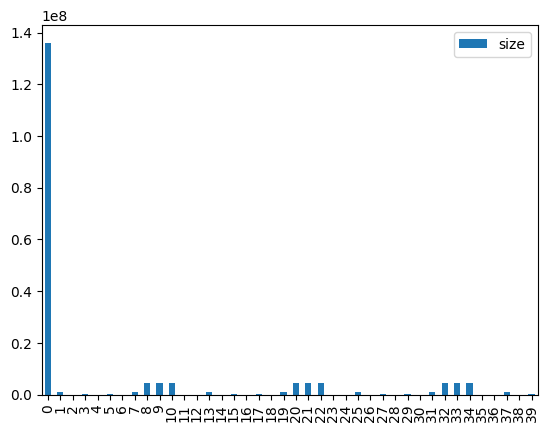

In [ ]:
df = pd.DataFrame(sizes, columns=['size', 'shape'])
df.iloc[:40].plot(y = 'size', kind='bar')

In fact, let's compare size of embeddings with the rest of the model parameters:

In [ ]:
df.loc[0,'size']/df.loc[:, 'size'].sum()

0.275557948415276

So, 28% of the model is in the embeddings.

## PCA

Now let's look at embeddings in more detail

In [ ]:
emb = model.get_input_embeddings()
emb_w = emb.weight
emb_w.shape

torch.Size([151936, 896])

We have about 150k tokens, and we use 896 dimensions to encode them. Let's see if there is any visible structure among them.

In [ ]:
w = emb_w.cpu().detach()
w = w.type(torch.Tensor)

Numbers, characters, symbols seem to be nicely grouped together:

In [ ]:
w_pca = w.pca(3)

In [ ]:
w_pca.shape

torch.Size([151936, 3])

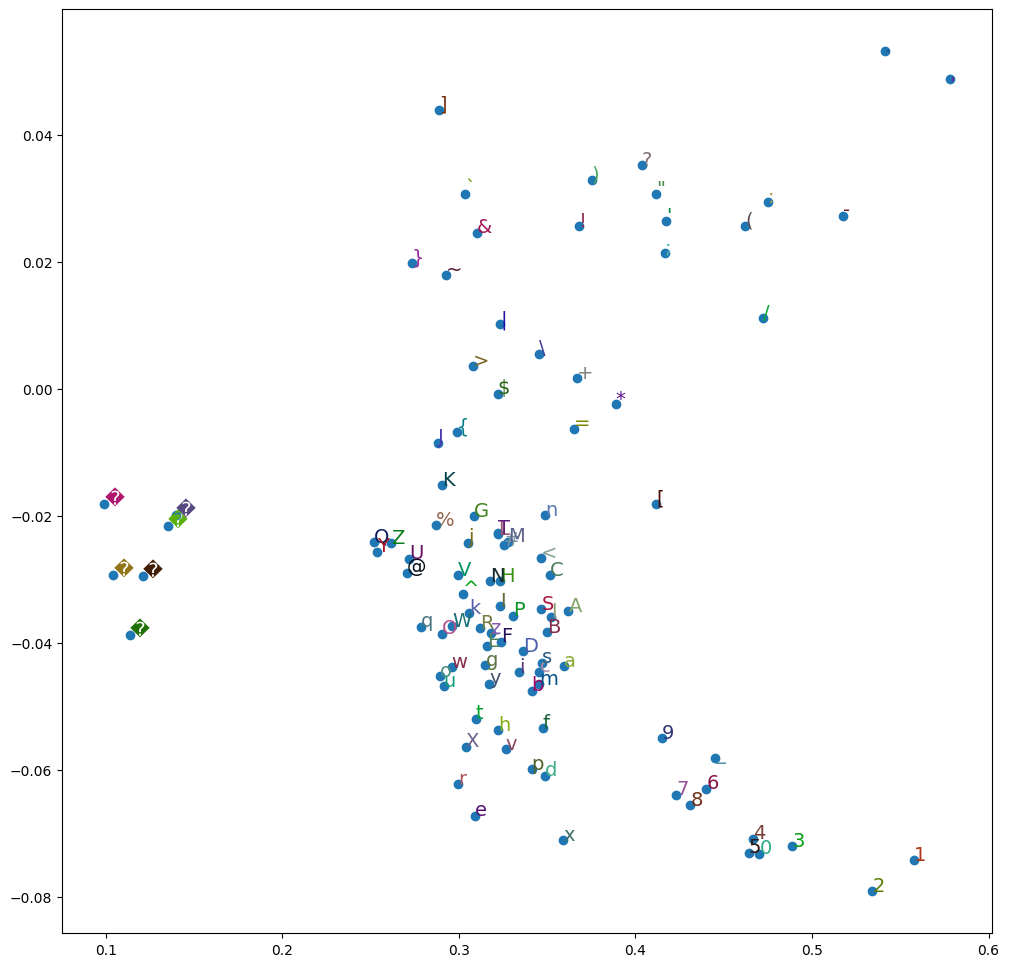

In [ ]:
fac0,fac1,fac2 = w_pca.t()[:3]
p = 0
idxs = list(range(p,p + 100))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(12,12))
plt.scatter(X, Y)
token_labels = [tokenizer.decode([i]) for i in idxs]
for i, x, y in zip(token_labels, X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=14)
#plt.show()
#plt.savefig('token_encodings.png')

## Understanding token embeddings

Now let's check if there are any tokens that have very similar encodings.

In [ ]:
token_labels = L([tokenizer.decode([i]) for i in range(w.shape[0])])
token_labels

(#151936) ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/','0','1','2','3','4'...]

In [ ]:
w.T.shape

torch.Size([896, 151936])

In [ ]:
df = pd.DataFrame(w.T, columns=token_labels)

Here is a correlation matrix of first 500 tokens. Notice that there is a suspicious cluster of tokens with large correlation.

<matplotlib.image.AxesImage>

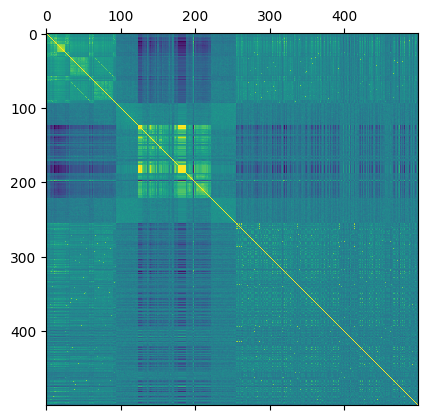

In [ ]:
plt.matshow(df.iloc[:,:500].corr())

In [ ]:
df.iloc[:,124:130].corr()

,�,�,�,�,�,�
�,1.000000,1.000000,0.036561,0.949049,0.999370,0.613330
�,1.000000,1.000000,0.036553,0.949040,0.999370,0.613357
�,0.036561,0.036553,1.000000,0.039240,0.036404,0.066037
�,0.949049,0.949040,0.039240,1.000000,0.948284,0.574783
�,0.999370,0.999370,0.036404,0.948284,1.000000,0.615100
�,0.613330,0.613357,0.066037,0.574783,0.615100,1.000000


<matplotlib.image.AxesImage>

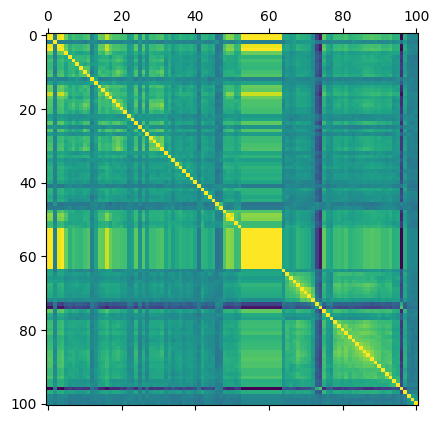

In [ ]:
plt.matshow(df.iloc[:,124:225].corr())

<matplotlib.image.AxesImage>

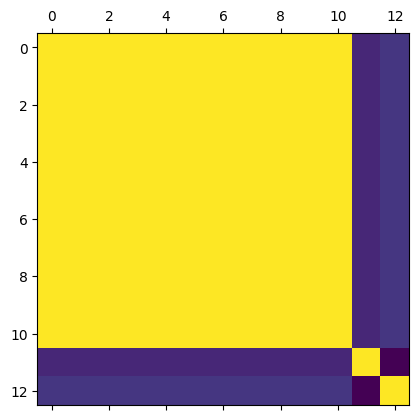

In [ ]:
plt.matshow(df.iloc[:,177:190].corr())

In [ ]:
df.iloc[:,177:190].corr()

,�,�,�,�,�,�,�,�,�,�,�, ,
�,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.286441,0.324009
�,1.000000,1.000000,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.286423,0.324003
�,1.000000,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.286415,0.323999
�,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.286428,0.324013
�,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.286434,0.324009
�,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.286445,0.324002
�,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.286447,0.324016
�,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.286421,0.323967
�,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.286428,0.323993
�,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.286425,0.324003


These have almost perfect correlation. But these seem to correspond to some special byte sequences. Perhaps this has something to do with unicode?

We can also put token embeddings into a dataframe, and join it together with token labels sequence for convenience:

In [ ]:
df = pd.DataFrame(w)

df['token'] = token_labels
df = df.reindex(columns=pd.Index([df.columns[-1]] + list(df.columns[:-1])))

df

,token,0,1,2,3,4,5,6,7,8,...,886,887,888,889,890,891,892,893,894,895
0,!,-0.010376,0.040771,0.009705,0.000070,-0.027100,-0.002975,-0.001160,-0.019531,0.028442,...,-0.008179,0.016724,0.022339,-0.027222,-0.029541,-0.015381,-0.007477,0.009827,0.013611,-0.006683
1,"""",-0.014587,-0.001366,-0.017700,-0.002670,0.003708,-0.001495,0.005402,-0.010620,0.017700,...,-0.013672,-0.038330,0.003433,-0.007355,-0.007172,0.001152,-0.005798,-0.002441,0.002441,-0.008118
2,#,-0.036621,-0.010193,0.007812,-0.010925,0.008057,0.016724,0.023438,-0.030273,-0.009399,...,-0.024048,-0.002716,0.006134,-0.007538,-0.008545,0.008789,0.011292,-0.007355,-0.017700,-0.000675
3,$,-0.009338,-0.012085,-0.015381,0.010864,0.003967,-0.005981,0.005707,-0.006866,0.014343,...,-0.047119,0.007324,0.007935,-0.006531,-0.019897,-0.007812,0.020874,-0.002655,0.015137,-0.017822
4,%,-0.009521,0.004211,0.006012,-0.018433,0.006409,0.013428,0.016846,0.003372,-0.000965,...,0.005798,-0.010742,-0.000957,-0.024170,-0.000463,0.010620,-0.003967,0.003937,-0.006195,-0.007874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151931,,0.005951,-0.005310,0.003326,0.002472,-0.003067,0.002563,-0.009583,0.015747,-0.000580,...,0.003845,0.016113,-0.010071,0.005066,0.011353,0.015320,-0.014954,-0.008179,-0.008179,0.018677
151932,,0.005951,-0.005310,0.003326,0.002472,-0.003067,0.002563,-0.009583,0.015747,-0.000580,...,0.003845,0.016113,-0.010071,0.005066,0.011353,0.015320,-0.014954,-0.008179,-0.008179,0.018677
151933,,0.005951,-0.005310,0.003326,0.002472,-0.003067,0.002563,-0.009583,0.015747,-0.000580,...,0.003845,0.016113,-0.010071,0.005066,0.011353,0.015320,-0.014954,-0.008179,-0.008179,0.018677
151934,,0.005951,-0.005310,0.003326,0.002472,-0.003067,0.002563,-0.009583,0.015747,-0.000580,...,0.003845,0.016113,-0.010071,0.005066,0.011353,0.015320,-0.014954,-0.008179,-0.008179,0.018677


## KDTree

To find nearest neighbours for sample query vectors, we can use KDTree.

KDTree allows fast nearest neighbour lookups, but it only works fast up to 20 dimensions (according to [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html)).

In [ ]:
from scipy.spatial import KDTree

Since KDTree is not good for high dimensions, we first reduce dimension to 10.

In [ ]:
w_pca = w.pca(10)

In [ ]:
w_pca.shape

torch.Size([151936, 10])

In [ ]:
m = KDTree(w_pca)

In [ ]:
small_distance = 0.001

m.count_neighbors(m, small_distance)

In [ ]:
neighbours = m.query_pairs(small_distance, output_type='ndarray')

In [ ]:
len(neighbours)

2700502

Here we find some tokens that are close to each other and compute their distances.

In [ ]:
first = 100
(w[neighbours[:first,0]] - w[neighbours[:first,1]]).norm(dim=1)

tensor([2.0965e-02, 1.2571e-02, 9.4396e-05, 5.1366e-05, 1.0017e-04, 1.1918e-04,
        9.8044e-05, 6.4521e-05, 1.6839e-04, 8.5055e-05, 8.5407e-05, 1.1496e-04,
        8.5661e-05, 9.6035e-05, 1.8153e-04, 1.0819e-04, 1.1803e-04, 1.0853e-04,
        4.9831e-05, 1.7295e-04, 9.1673e-05, 2.3365e-05, 1.1710e-04, 1.6766e-04,
        9.1910e-05, 1.2525e-04, 1.7944e-04, 1.1530e-04, 1.6751e-04, 1.6791e-04,
        1.6262e-04, 1.6276e-04, 1.6613e-04, 1.6330e-04, 1.6705e-04, 1.6770e-04,
        1.6613e-04, 1.8194e-04, 1.6276e-04, 1.7519e-04, 1.7631e-04, 1.7975e-04,
        1.7582e-04, 1.8060e-04, 1.8088e-04, 1.7943e-04, 1.9296e-04, 1.7532e-04,
        1.6906e-04, 1.6746e-04, 1.7243e-04, 1.6834e-04, 1.7197e-04, 1.7227e-04,
        1.7074e-04, 1.8616e-04, 1.6781e-04, 1.6329e-04, 1.6200e-04, 1.6678e-04,
        1.6255e-04, 1.6631e-04, 1.6556e-04, 1.6539e-04, 1.8126e-04, 1.6200e-04,
        1.7570e-04, 1.7416e-04, 1.7895e-04, 1.7467e-04, 1.7719e-04, 1.7879e-04,
        1.7732e-04, 1.9221e-04, 1.7416e-

Unfortunately, the fact that tokens are close to each other doesn't mean that there is any connection
between these tokens:

In [ ]:
L(zip(token_labels[neighbours[:first, 0]], token_labels[neighbours[:first, 1]]))

(#100) [('궕', 'ᥔ'),('ᨪ', '궕'),('吏', ''),('<|vision_end|>', ''),('憐', ''),('', ''),('', ''),('閭', ''),('ด่วน', ''),('吏', '<|vision_end|>'),('憐', '吏'),('吏', ''),('吏', ''),('閭', '吏'),('ด่วน', '吏'),('憐', '<|vision_end|>'),('<|vision_end|>', ''),('<|vision_end|>', ''),('閭', '<|vision_end|>'),('ด่วน', '<|vision_end|>')...]

So, closest tokens are not a good measure of tokens being related to each other.

In [ ]:
ts = tokenizer.encode('wet water')
[(t, tokenizer.decode(t)) for t in ts]

[(86, 'w'), (295, 'et'), (3015, ' water')]

In [ ]:
water = 3015
water = w_pca[water]
dist, items = m.query(water, k=20)
L(tokenizer.decode([i]) for i in items)

(#20) [' water',' bit',' access',' turn',' ×',' March',' exact',' target',' page',' different',' file',' defined',' essential',' Thomas',' unit',' count',' status',' functional',' quality',' zero']

Lets now try using all vectors from a sentence

In [ ]:
def find_neighbours(query):
    ts = tokenizer.encode(query)
    v = w_pca[ts].sum(dim=0)
    dist, items = m.query(v, k=20)
    return L(tokenizer.decode([i]) for i in items)

In [ ]:
find_neighbours(' lava')

(#20) [' lava','太阳能','董事会',' stimuli',' fungal',' embody',' daring',' audience',' hazardous',' tumor',' vascular',' damping',' soothing',' qualifies',' addiction','纷纷',' herbal',' melan',' стран','答应']

In [ ]:
find_neighbours(' magma')

(#20) [' magma','事迹','周恩来','蒋介石','あたり','应收账款','规程','秦国',' serotonin','份额',' Jain','長期',' dopamine',' scalp','理财产品',' cereal',' disciplines',' словам','班组',' мероприятия']

In [ ]:
find_neighbours('lava')

(#20) ['l','m','c','d','a','f','A','B','p','9','b','7','x','6','C','8','v','h','s','D']

In [ ]:
find_neighbours('lava fire hot')

(#20) [',','1','2',' (','.','3',':',' ','-','4','0','/',' -','5','6',' "','8',' and','7',' in']

Doesn't seem like there's much structure here!

But here is the structure I was able to find:

In [ ]:
find_neighbours('1')

(#20) ['1','2','3','5','4','0','6','8','7','9','/',':','.','-','(',',','[','_',';',"'"]

In [ ]:
find_neighbours('A')

(#20) ['A','S','B','C','s','D','a','l','i','N','m','M','P','n','d','T','E','I','x','R']

In [ ]:
find_neighbours('$')

(#20) ['$','{','>','%','|','&','//','#','`','}','<','("','^','L','--','I','T','+','::','R']

Does this work for anything else?

Look, countries sort of work!

In [ ]:
find_neighbours(' Ontario')

(#20) [' Ontario','实时',' Wisconsin',' Alaska',' Oregon',' Potter',' Seattle',' Alabama',' Maine',' Michigan',' superficial',' friction',' Detroit',' Iran',' Portland','.py',' Philadelphia',' rigor',' Pennsylvania','相当于']

Class and unit are related:

In [ ]:
find_neighbours(' Class')

(#20) [' Class',' unit',' sign',' black',' Group',' change',' Type',' path',' level',' power',' deep',' direct',' line',' split',' fast',' count',' order',' block',' DO',' value']

In [ ]:
find_neighbours('**')

(#20) ['**','..','---','--','`','}',']','~','…','____','”','>',' ?','—','\\\\','("',' >','()','%','\u200b']

## Singular values

Yet another way to understand a matrix is to look at its singular values and their distirbution.

In [ ]:
clean_memory()

In [ ]:
U, S, Vh = torch.linalg.svd(w, full_matrices=False)

In [ ]:
U.shape, S.shape, Vh.shape

(torch.Size([151936, 896]), torch.Size([896]), torch.Size([896, 896]))

In [ ]:
S[:70]

tensor([75.2048, 15.9967, 13.2013, 10.6195, 10.5224,  9.5778,  9.1092,  8.6585,
         8.2998,  8.1300,  7.9553,  7.7216,  7.5018,  7.3106,  7.2360,  7.1848,
         7.1072,  7.0573,  7.0249,  6.9709,  6.9112,  6.8638,  6.8472,  6.8007,
         6.7806,  6.7488,  6.7466,  6.7255,  6.6886,  6.6821,  6.6695,  6.6449,
         6.6378,  6.6109,  6.5966,  6.5856,  6.5781,  6.5602,  6.5523,  6.5365,
         6.5208,  6.5109,  6.5013,  6.4817,  6.4740,  6.4708,  6.4575,  6.4540,
         6.4452,  6.4395,  6.4335,  6.4130,  6.4117,  6.3935,  6.3885,  6.3838,
         6.3800,  6.3771,  6.3733,  6.3621,  6.3533,  6.3416,  6.3364,  6.3318,
         6.3283,  6.3232,  6.3199,  6.3130,  6.3038,  6.2935])

[<matplotlib.lines.Line2D>]

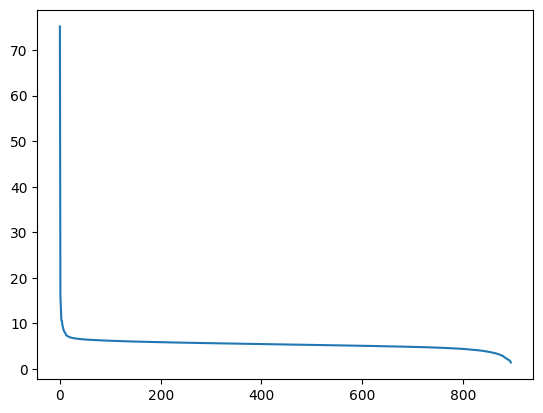

In [ ]:
plt.plot(S)

[<matplotlib.lines.Line2D>]

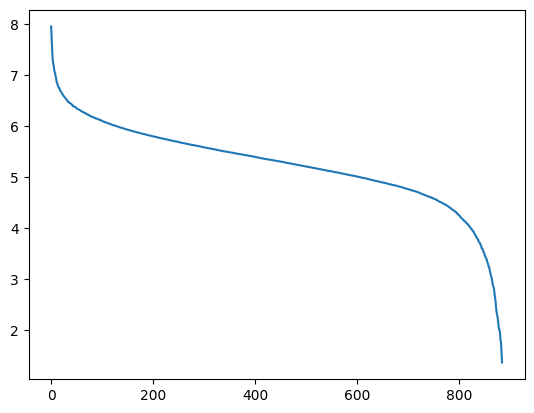

In [ ]:
plt.plot(S[10:])

Looking at singular values, we see that they drop rapidly!

This should be surprising because when the model was made we started
with fully random matrix.

And random matrices have uniformly distributed singular values.
This means that all embeddings lie very closely to a certain low-dimensional
space.

Above we can see that singular values stop dropping rapidly at about 100 dimensions,
so if we keep just 100 dimensions we might still be able to have a model that
can produce sensible text.

But first, for comparison, lets look at singular values of a random matrix:

In [ ]:
w_random = torch.randn(w.shape)

In [ ]:
Ur, Sr, Vhr = torch.linalg.svd(w_random, full_matrices=False)

In [ ]:
Sr[:70]

tensor([419.4922, 419.2200, 418.8347, 418.7828, 418.7401, 418.2579, 418.1684,
        418.0732, 417.9306, 417.6548, 417.4839, 417.4085, 417.3276, 417.0378,
        416.9029, 416.8173, 416.7499, 416.6445, 416.5141, 416.4569, 416.2802,
        416.2378, 416.0545, 415.9872, 415.9027, 415.8290, 415.6523, 415.5988,
        415.4861, 415.4289, 415.2998, 415.1790, 415.1625, 414.9554, 414.8152,
        414.7798, 414.7103, 414.5463, 414.4521, 414.3818, 414.2459, 414.1892,
        414.0259, 413.9031, 413.8279, 413.7903, 413.7162, 413.5286, 413.4558,
        413.4163, 413.3558, 413.1771, 413.0956, 413.0775, 412.9968, 412.7909,
        412.7854, 412.7141, 412.6904, 412.5693, 412.4755, 412.3453, 412.2935,
        412.1939, 412.1080, 411.9935, 411.9718, 411.8588, 411.8069, 411.6788])

<matplotlib.legend.Legend>

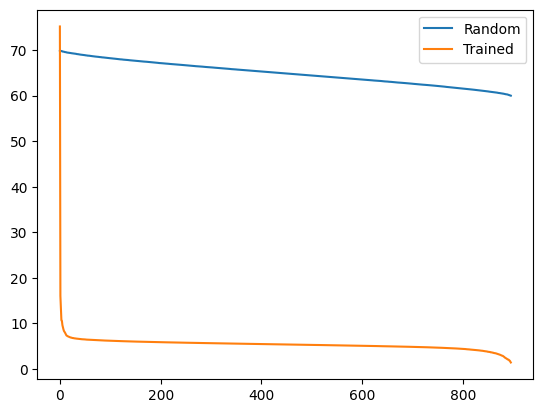

In [ ]:
plt.plot(Sr/420*70, label="Random")
plt.plot(S, label="Trained")
plt.legend()

As you can see, there is a huge difference between a random matrix and a matrix that has been optimized with backpropogation.

Now, lets look at how SVD can be used to recover back the original matrix:

In [ ]:
torch.dist(w, U @ torch.diag_embed(S) @ Vh)

tensor(0.0006)

In [ ]:
w.norm()

tensor(175.0522)

In [ ]:
Ss = S.clone().detach()
Ss[400:] = 0
torch.dist(w, U @ torch.diag_embed(Ss) @ Vh)

tensor(104.2088)

In [ ]:
w_simple = U @ torch.diag_embed(Ss) @ Vh

In [ ]:
w_simple

tensor([[-0.0232,  0.0167,  0.0034,  ...,  0.0095,  0.0035, -0.0037],
        [-0.0199,  0.0100, -0.0105,  ...,  0.0040,  0.0058, -0.0145],
        [-0.0326, -0.0043,  0.0046,  ...,  0.0129, -0.0049, -0.0117],
        ...,
        [ 0.0058, -0.0052,  0.0030,  ..., -0.0077, -0.0083,  0.0182],
        [ 0.0058, -0.0052,  0.0030,  ..., -0.0077, -0.0083,  0.0182],
        [ 0.0058, -0.0052,  0.0030,  ..., -0.0077, -0.0083,  0.0182]])

In [ ]:
w

tensor([[-0.0104,  0.0408,  0.0097,  ...,  0.0098,  0.0136, -0.0067],
        [-0.0146, -0.0014, -0.0177,  ..., -0.0024,  0.0024, -0.0081],
        [-0.0366, -0.0102,  0.0078,  ..., -0.0074, -0.0177, -0.0007],
        ...,
        [ 0.0060, -0.0053,  0.0033,  ..., -0.0082, -0.0082,  0.0187],
        [ 0.0060, -0.0053,  0.0033,  ..., -0.0082, -0.0082,  0.0187],
        [ 0.0060, -0.0053,  0.0033,  ..., -0.0082, -0.0082,  0.0187]])

In [ ]:
emb_w.dtype

torch.bfloat16

In [ ]:
w_simple = w_simple.type(torch.HalfTensor).bfloat16().to('cuda:0')

In [ ]:
model.model.embed_tokens.weight = torch.nn.Parameter(w_simple)

In [ ]:
def run_demo(s_vals):
    Ss = S.clone().detach()
    Ss[s_vals:] = 0
    w_simple = U @ torch.diag_embed(Ss) @ Vh
    print(f"compression error: {torch.dist(w, w_simple)}")

    w_simple = w_simple.type(torch.HalfTensor).bfloat16().to('cuda:0')
    model.model.embed_tokens.weight = torch.nn.Parameter(w_simple)
    demo(128)

200 singular values is too little, the model breaks completely:

In [ ]:
run_demo(200)

compression error: 130.39418029785156


 Conditioning

 Lambdaizations

 аccessation с

 tionality

 Lambdaization s аccessation с

 tionality

 Lambdaization s аAccessExceptionationс

 Lambdaization s аAccessExceptionationс

 Lambdaization s аAccessExceptionationс

 Lambdaizations

 Lambdaization с

 Lambdaizations

 Lambdaization s аAccessExceptionationс 

 Lambdaization s аAccessExceptionationс

 Lambdaization s аAccessExceptionationс

 Lambdaization s аAccessExceptionationс

 Lambdaizations  Lambdaization s аAccessExceptionationс

 LambdaIZATION с

 Lambdaications

 Lambdaitations

 Lambdaigation с

 Lambdaigation с

 Lambdaigations

400 is a bit better, the model produces text that is somewhat coherent

In [ ]:
run_demo(400)

compression error: 104.20878601074219


 �ake an prediction

 predicting the prediction with predictions. Bayesian inference

 Bayesian inference is Bayesian inference's Bayesian inference C Bayesian inference With prediction- Bayesian inference

 Bayesian inference C Bayesian inference With prediction

 Bayesian inference C Bayesian inference с Bayesian inference с Bayesian inference с Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inferenceс Bayesian inference

In [ ]:
run_demo(400)

compression error: 104.20878601074219


 Large language models like the token embeddings, PCA layers

nearest neighbors and KD tree

 singular values



Remember that the original embedding dimension was 896:

In [ ]:
w.shape

torch.Size([151936, 896])

In [ ]:
run_demo(600)

compression error: 74.72993469238281


 Write an introduction an blog post about the token embeddings in PCA approach and layer sizes

 nearest neighbours approach

 KD tree approach

 singular values approach



In [ ]:
run_demo(800)

compression error: 34.6391487121582


Certainly! Here's a brief introduction to the a blog post about large language model token embeddings:

Token embeddings are an essential component of natural language processing ( NLP) research areas. that enable models like LLMs to understand and process tokens in contextually. analyze text.

Large-scale language models like BERT or GPT- often require embedding layers to capture these contextual information effectively

PCA ( Principal Component Analysis is a statistical technique used to reduce the dimensionality of extract important features from data

layer sizes and nearest neighbours are two popular approaches for identifying key features in token embeddings

KD tree ( k-d tree is a efficient spatial indexing technique

In [ ]:
run_demo(800)

compression error: 34.6391487121582


Sure! Let's introduce the large language model (token embeddings and also talk about how we can extract these embeddings using PCA, layer sizes and nearest neighbors.

PCA ( is a technique that can help us reduce dimensionality while retaining most ofer ofentities in a data set. PCA is a popular method in computer vision and image processing

layer sizes could be used to specify the number o f hidden layers in each layer size could be specified as the the number o f neurons in each layer The KNN (is a algorithm that could be used t obtain the nearest neighbors in a data set In machine learning t o predict new items based on

Notice that LLM no longer seems to remember how to close paranthesis. That was probably lost in compression.

In [ ]:
run_demo(890)

compression error: 4.259422302246094


Welcome to our exploration of the fascinating world of large language models (LLMs) and their groundbreaking advancements in natural language processing (NLP). As we delve into the complex world of token embeddings, we'll uncover some intriguing insights that shed light on how these powerful models learn and process text data.

In recent years, researchers have made significant strides in developing sophisticated methods for analyzing and understanding the intricate patterns hidden within vast amounts of textual data. One such method is token embedding, which has become one of the most widely used techniques in NLP due to its ability to capture semantic meaning across different contexts.

But what exactly does this mean? Let's

This looks pretty decent.

In [ ]:
run_demo(850)

compression error: 19.876100540161133


# Exploring the Role of Large Language Model Token Embeddings in Natural Language Processing

Natural language processing (NLP) is a field that focuses on enabling computers to understand and interact with humans in a human-like way. One crucial aspect of NLP is the understanding how text is structured and represented by humans. The process of tokenizing text into smaller units called tokens is one of the most fundamental steps in NLP. However, understanding how well this process works can be challenging, especially when dealing with complex languages or texts with very different vocabularies.

That's where large language models come in - they are artificial intelligence systems designed to generate

In [ ]:
run_demo(830)

compression error: 26.247896194458008


# Introduction to Blog Post: "Token Embeddings in the Large Language Model

In recent years, the development of large language models (LLMs has seen explosive growth. and their capability to understand natural language text is one of the most significant changes. have happened. . 

One key aspect e.g. that llms can handle is the complex structure e.g. those found in many natural languages e.g. english. french. spanish. chinese. etc. they need to be able to understand how words relate to each other e.g. how a word like "dog" is related to another word like "cat". 

This ability comes

## Adding noise

Now that we are on the topic of breaking LLMs, lets investigate what happens if we add a bit of noise to embeddings.
In other words, how much noise can we add before LLM breaks completely?

In [ ]:
w

tensor([[-0.0104,  0.0408,  0.0097,  ...,  0.0098,  0.0136, -0.0067],
        [-0.0146, -0.0014, -0.0177,  ..., -0.0024,  0.0024, -0.0081],
        [-0.0366, -0.0102,  0.0078,  ..., -0.0074, -0.0177, -0.0007],
        ...,
        [ 0.0060, -0.0053,  0.0033,  ..., -0.0082, -0.0082,  0.0187],
        [ 0.0060, -0.0053,  0.0033,  ..., -0.0082, -0.0082,  0.0187],
        [ 0.0060, -0.0053,  0.0033,  ..., -0.0082, -0.0082,  0.0187]])

In [ ]:
w.std()

tensor(0.0152)

In [ ]:
def run_demo(noise, max_new_tokens=128):
    w_simple = w + noise*torch.randn(w.shape)*w.std()
    print(f"compression error: {torch.dist(w, w_simple)}")

    w_simple = w_simple.type(torch.HalfTensor).bfloat16().to('cuda:0')
    model.model.embed_tokens.weight = torch.nn.Parameter(w_simple)
    demo(max_new_tokens)

In [ ]:
run_demo(0)

compression error: 0.0


**Introduction**

In the realm of natural language processing and machine learning, understanding the structure of text is crucial for developing effective models that can comprehend complex language tasks. One key aspect of this complexity is the representation of text data using tokens, which are fundamental units of information within the language. The tokenization process involves breaking down continuous text into discrete segments or words, which are then used as input features in various models.

One approach to represent these tokens is through embedding layers, where each token's position is mapped to a vector space. This mapping allows for efficient computation of the dot product between vectors representing different tokens, enabling the modeling of semantic relationships

In [ ]:
run_demo(0.01)

compression error: 1.7495441436767578


Welcome to our exploration of the fascinating world of large language models and their groundbreaking advancements in natural language processing! In this blog post, we'll delve into the intricate world of token embeddings, where the foundation of language understanding is laid bare. From the simple layers that capture word frequencies to the complex algorithms that sift through the data to reveal patterns, we'll unravel the secrets behind these essential components.

Firstly, let's explore the role of PCA (Principal Component Analysis) in dimensionality reduction. By visualizing your text data using a 2D PCA plot, you can identify which words or phrases are most indicative of different topics. This technique

In [ ]:
run_demo(0.1)

compression error: 17.48781967163086


**Introduction to Large Language Model Token Embeddings**

In recent years, the integration of large language models (LLMs) into various applications has dramatically transformed the way we interact with technology and information. One of the key innovations in this space is the development of token embeddings, which serve as a powerful tool for understanding the structure and semantic relationships within textual data.

Token embeddings are essentially vectors that represent each word or sequence of words in a document using numerical representations. This transformation allows us to capture not only the meaning of individual words but also their contextual relationships across the entire text. By analyzing these embeddings at different layers, researchers can gain insights into the

In [ ]:
run_demo(1)

compression error: 175.2798309326172


# Introduction

The field of Natural Language Processing (NLP) is increasingly critical in the rapidly-evolving landscape of AI research and technology. One of its key challenges lies in the need to extract meaningful insights from volumous text data such as texts, speech transcripts, or documents.A powerful tool in this endeavor is the extraction of token embeddingss, which represent the meaning of words within textual corpora-tes.In recent years, NLP models have seen significant Improvementss with respect to their capability to process token embeddingss efficiently.

This blog post will explore various aspects related to token embeddingss, including their principal characteristics, essential dimensions

Huh? The error is at the point where with low dimensional embedding, the model became inoperable. But here, it still produces something reasonable.

In [ ]:
run_demo(10)

compression error: 1748.9488525390625


s c ?1  & |..B-
 .. n.io. ...G.B !..F B ALL al M AN ?. N DOAD/( unet etc   of; upon] FOR by and]+  the  G);)  i et R  #| ren.AE-&  NE RE AB.
r uin U&  | CAP     at.   its OF w TO ofG & .?
  RE rem's volf Ben aga on>. !  -'?.. in. p which-d

In [ ]:
run_demo(5)

compression error: 874.4374389648438


 entmssIo

 nd ust mC.Enttn t n- Sment

 Cis Ent usiationng

eric n-- Car InchRht C ch- Ung nenc. Mepsmemus in
 m cm ein me mpng mo pent n enment tionn CA-CT
 R AS-e C i C.- NmesnessEmee E-m-fnere- P mor C Smein.-co r-me.-e p H- Fent G Me Ch.- ce Mornumee

In [ ]:
run_demo(4)

compression error: 701.1428833007812


 p E E An  C A R E B FanE n p E An M A F E A EF K Hs0

 g- A R G A Srt t R c of-t An t's def FO k Kou K s) k o'K F O in p Z N K E F1 R K P K-Ko AF D K-F F FP1 Tlaont Ak amdth A K FRA K F Fum O A R GAP E O--F i R a a B B F A3 A GR- K KR r F FAna

In [ ]:
run_demo(3)

compression error: 525.580322265625


 P
P Inere

 Bo iner ch boer Recar ar Ar C acser arc erRec Are c re re neRe cre- ng n f B nd near fo AR-Ce fr-Chn pee Per ne Rep ref-ref neRef mo fo Ref rem For m neOrure fr Ph Por prf fo ne ph ne rep near of f rec n ne ref r neAcr neC ref N r neRef neT ne fne f ne refNe ne ne reN ne ne r r neRef ne ne Tm-nT t ne refN-n n o

In [ ]:
run_demo(2)

compression error: 350.5704345703125




sai s b

t Sus

s usut Cu

suc

S u t

s ut

S t

S Us t

S ut

s Ut t

s U t

sUt

s Uut

sUU

sue

s UE

s UEU

sues

s r

su

s U

s U t

s UUT

sUt

s u

sue

s UE

sUE

s U e

s UE

su e

s UE

su e

sue

s ue

sUE

s

In [ ]:
run_demo(1)

compression error: 175.27740478515625


Introduction pour um

I'm going to write an introductory para um sobre the embedding of the deep learning models, particularly on the "token" embedding. I'll be using some keyphs and tags.

Tags: 

 1. **Polarity** - A popular Model in the field of NLP.
 2. **Layer Sizes** - The number of layers used by the model.
 3. ** Nearest Bunches** - The number of nearest neighbors used by the model.
 4. ** Kd Tree** - A method that uses the k-d tree to find the most frequent word.
 5. **

Haha, this model is drunk

In [ ]:
run_demo(0.5, 512)

compression error: 87.64675903320312


Introducing the captivating world of Large Language Models (LLMs) with their unique ability to process vast amounts of text data with unparalleled efficiency and precision. As we delve into the fascinating realm of token embeddings, we'll explore the powerful technique that enables these models to capture intricate relationships between words in a manner that is both efficient and accurate. Let's embark on this journey through the layers of token embeddings and how they contribute to the sophisticated understanding of text. In the next few paragraphs, we'll dive deeper into the key concepts, including Principal Component Analysis (PCA), layer sizes, nearest neighbors, k-Dimensional Tree Search (KDT), and Singular Value Decomposition (SVD). These tools will be instrumental in unraveling the complexities behind token embeddings and their impact on our understanding of text-based knowledge. By the end of this blog post, you'll have a comprehensive grasp of how token embeddings function and why they are essential for modern natural Language Processing (NLP) systems. Don't miss out on this fascinating exploration!

So, we can see that the model is resistant to noise, as long as this noise is not biased.

In particular, it doesn't like "most descriptive subspace" projection type noise.

So, if we want to reduce dimension, we should reduce it in such a way that there is no
biased direction.

Fortunately, there is a way to achive that using a random projection.

In [ ]:
w.shape

torch.Size([151936, 896])

We generate a random matrix, and multiply our encoding matrix by it to get an encoding matrix of smaller size.

In [ ]:
low_dim = 200
projection = torch.randn((w.shape[1], low_dim))
# debug
#projection = torch.randn((low_dim, low_dim))
projection.shape

torch.Size([896, 200])

In [ ]:
(w @ projection).shape

torch.Size([151936, 200])

To get back to the original space, we need to invert our projection.
Of course, this is not an invertible matrix, so we use pseudoinverse.

In [ ]:
torch.linalg.pinv?

Docstring:
linalg.pinv(A, *, atol=None, rtol=None, hermitian=False, out=None) -> Tensor

Computes the pseudoinverse (Moore-Penrose inverse) of a matrix.

The pseudoinverse may be `defined algebraically`_
but it is more computationally convenient to understand it `through the SVD`_

Supports input of float, double, cfloat and cdouble dtypes.
Also supports batches of matrices, and if :attr:`A` is a batch of matrices then
the output has the same batch dimensions.

If :attr:`hermitian`\ `= True`, :attr:`A` is assumed to be Hermitian if complex or
symmetric if real, but this is not checked internally. Instead, just the lower
triangular part of the matrix is used in the computations.

The singular values (or the norm of the eigenvalues when :attr:`hermitian`\ `= True`)
that are below :math:`\max(\text{atol}, \sigma_1 \cdot \text{rtol})` threshold are
treated as zero and discarded in the computation,
where :math:`\sigma_1` is the largest singular value (or eigenvalue).

If :attr:`rtol` is not

In [ ]:
inverse = projection.pinverse()
inverse.shape

torch.Size([200, 896])

In [ ]:
(projection @ inverse).shape, (inverse @ projection).shape

(torch.Size([896, 896]), torch.Size([200, 200]))

<matplotlib.image.AxesImage>

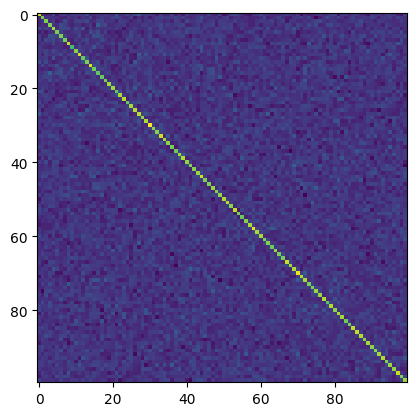

In [ ]:
plt.imshow((projection @ inverse)[:100,:100])

In [ ]:
(w @ projection @ inverse).shape

torch.Size([151936, 896])

In [ ]:
def run_demo(low_dim, max_new_tokens=128):
    projection = torch.randn((w.shape[1], low_dim))
    inverse = projection.pinverse()
    w_simple = w @ projection @ inverse
    print(f"compression error: {torch.dist(w, w_simple)}")

    w_simple = w_simple.type(torch.HalfTensor).bfloat16().to('cuda:0')
    model.model.embed_tokens.weight = torch.nn.Parameter(w_simple)
    demo(max_new_tokens)

In [ ]:
run_demo(200)

compression error: 153.46058654785156


 ARс AR А р а а А ра А р Aа А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А А р А

In [ ]:
run_demo(300)

compression error: 142.6547088623047


 Bel таг



























































































































































































































































In [ ]:
run_demo(400)

compression error: 130.0930938720703











































    
s

 Tocorrelating-model.

 

にのるい てる �りug. たug-siugnt  �.   �anug.  tug-gngnt.  tigugnt.
  �augnt はりug.  �ognt たug-signt.  tigugnt.

  �aougnt  �gugnt  �augnt  �gugnt.
  �aougnt  �

In [ ]:
run_demo(500)

compression error: 116.29911041259766


###! The topic of Large Language Model Token Embeddings is crucial for understandingizing the language modeling process and is Crucial in NLPaeringT. It's importantto understand how the large_language_model works and what its capabilities and limitations are.

In this 1st, I will discussLanguanguage Modeling过程中的Token Embeddings。 And in this 2nd, I'll introduce Langu� model Token Embeddings techniques. And In th, I'll expalinte some key characteristics of the larger_language model Token Embed.nts. 

The Topic OF LARGE LANG MODEL TOKEN EMBED IS CRIOUS AND NLPa

In [ ]:
run_demo(600)

compression error: 100.79779052734375


 **Title:** Large Language Model Token Embeddings: An Introduction

**Abstract:** This blog post introduces the concept of Large Language Model (LLM) and its core component—the Token Embeddings. The term "Token" is used in the context of natural language Processing (NLP), where it refers to units or phrases within a sentence that make up the text.

In this article, we'll explore how these units can be represented as vectors with specific dimensions. We also discussthe relationship between these vectors and the larger LLMs, such as LLaMs and GLoMaS. Lastly, we will delve into how the embedding space

In [ ]:
run_demo(700)

compression error: 82.64166259765625


Introduction:

In today's blog post, we'll dive into the fascinating world of token embeddings in natural language processing (NLP), with a focus on understanding how these embeddings can be generated and utilized. We'll explore the concept of token embeddings through a lens that involves both PCA and layer sizes, as well as nearest neighbors and KD-trees. Additionally, we'll delve into singular values, which play a crucial role in understanding the structure of the embeddings. Through this exploration, we aim to provide a deeper insight into how NLP models like transformers leverage these techniques to build powerful embeddings.

In [ ]:
run_demo(800)

compression error: 56.02879333496094


**Introduction**

In today's digital age, the development of large language models has revolutionized various fields such as natural language processing, machine learning, and more. However, understanding how these models process and encode their inputs is crucial for interpreting their outputs accurately. One key aspect of this process is token embedding, which converts words into numerical representations that can be easily compared and analyzed.

This blog post delves into the world of token embeddings through an exploration of Principal Component Analysis (PCA), Layer Sizes, Nearest Neighbors, KD Trees, and Singular Values. By examining these concepts in detail, we aim to provide a comprehensive understanding of how token

At just 600 dimensions, the model is able to produce coherent text!

In [ ]:
run_demo(600, 512)

compression error: 100.35061645507812


# The Power of Large Language Models: Understanding Token Embeddings Through Dimensional Analysis Techniques

As we delve deeper into the complex landscape of natural language processing and machine learning, it's crucial to understand how these models process information. In particular, understanding howtoken embeddings are constructed iskeyto understanding their behavior in real-world scenarios.

In this blogpost, I'll provide insight on how dimensionalitys analysis techniques can be used to understand the distribution of token embeddings across various layers of a largelanguage model. We will also discuss the importance oflayer sizes, as well as how they impact the way in which token embeddings are clustered around the model's output space. Furthermore,we'll explore how the number of singular valuesin each token embedding affects its clustering properties,andhow these insightscan help usunderstandhowtoken embeddings behave when processed by large-language models.

Let’s dive deep into the importance ofdimensionalityon the token embeddings and learn howto understand them through a dimensionalal approach. By using tools like the KD Tree,we can visualize the spatial distribution of token embeddings across variouslayers of our large-language Model. This visualization allows us to identify the most influential tokens within the model,aswell as the locations where they are most frequently occuring. Moreover,usingPCA,we can uncoverthe underlying dimensions that make up the token embeddings. Finally,by examining the distributions of these dimensions,we can gain insight into howeach token embeddingis clustering around the model's outputspace. 

This blogpost aims to offer a fundamental comprehension of the power of token embeddings and howthey interact with larger-scale modeling systems. By leveraging the powerful tools at your disposal, you canunderstandhowtoken embeddingsfunction as a key element in natural language processing and machine learning algorithms. Let's get started!

In [ ]:
run_demo(600, 2048)

compression error: 100.91890716552734


Sure! Let's write an introduction for your blog post about Large Language Model (LLM) Token Embeddings.

### Introduction

In recent years, the advent of Large Language Models (LLMs) has revolutionized how we interact with text and other forms of information. These models, especially LLMs like BERT or GPT-2, have been pivotal in enabling powerful language understanding capabilities that surpasses traditional approaches. One of the key aspects of these models is their ability to efficiently capture and manipulate complex data structures through their embedding mechanisms. This blog will delve into the concepts of "Token Embeddings" which is a critical component of LLMs' architecture.

###PCA, Layer Sizes, Nearest Neighbours, KD Tree, Singular Values

#### PCA (Principal Component Analysis)

PCA stands as one of the foundational tools in the realm of LLMs. It was developed by the research group at Stanford University. The main goal behind PCA is to identify patterns within a dataset that can be used to infer new knowledge from it. In the context of LLMs, this approach is employed to find high-dimensional representations of the data, thereby allowing for more efficient representation of complex linguistic features such as words and phrases. 

#### Layer Sizes

The number of layers in LLMs also plays a crucial role in capturing complex datastructures. Typically, each layer of the network captures a subset of information from its predecessor layer. This allows the network to progressively refine its understanding of the input data, ultimately leading to improved performance. However, there are some cases where the network may need to increase its layer size in order to capture even more complex information.

#### Nearest Neighbours

Nearest-neighbors refers to a technique that helps in identifying neighboring tokens (i.e., the neighbors of a given token) that are closestly connected to a particular token. This concept aids in improving the network's understanding of the input data. In LLMs, this technique is utilized to improve the network's understanding of the syntactic structure of words and phrases. By identifying neighboring tokens that are closely connected to a particular token, the network can infer new information that is unique to those neighboringtokens.

#### KD Tree

KD tree is another tool that is commonly employed in the context of LLMs. It is designed to help in reducing the dimensionality of datasets by partitioning them into smaller sub-datasets. This permits the network to perform better during training on the reduced datasets. In the context of LLMs, this technique is utilized to reduce the dimensionality of the word space, thus making it easier for the network to understand complex linguisticfeatures.

#### Singular Values

Singular values are another concept used in LLMs that allow the network to capture intricate relationships between words and phrases. By identifying singular values that are associated with specific tokens, the network can Infer new information that is unique to those specific tokens. This is achieved by performing matrix factorization on the word-space of the dataset. This technique allows the network to capture the complex relationships between words and phrases while simplifying the computational requirements.

###Conclusion

In conclusion, the concepts of PCA, layer sizes, nearest-neighbors, KD Tree, and singular values are all essential components of LLMs. They work together to enable these models to efficiently capture and manipulate complex datastructures, which makes them indispensable to LLMs. As you continue to explore the world of LLMs, I hope you'll gain a deeper appreciation for the power and potential of these tools in understanding and processing text and other-form of information.

So, it sounds like we can reduce 896 dimensions all the way down to 600 dimensions. Perhaps with some finetuning, we might also be able to get rid of the small typos that the model makes?

## Why does random projection work?

First of all, why is the model resistant to noise?

Notice that the attention mechanism takes weighted averages of token vectors, and hence
any noise added to token vectors would be reduced automatically.

Now, why does random subspace projection behave as adding noise?

Lets take a random projection, and then go back to the original space using the pseudoinverse,
and look what the overall resulting operation looks like:

<matplotlib.image.AxesImage>

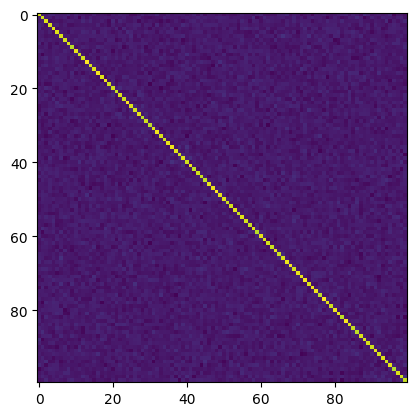

In [ ]:
low_dim = 600
projection = torch.randn((w.shape[1], low_dim))
inverse = projection.pinverse()

op = projection @ inverse

plt.imshow(op[:100,:100])

As you can see, it looks very close to a scaled identity matrix, plus some random noise in all other entries.

$O = I*f + R$

In [ ]:
op.shape

torch.Size([896, 896])

What is f equal to? We can compute this as

In [ ]:
op.diag().mean()

tensor(0.6696)

<matplotlib.image.AxesImage>

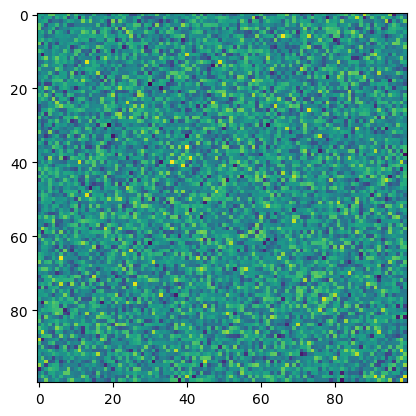

In [ ]:
r = op - torch.eye(op.shape[0])*op.diag().mean()

plt.imshow(r[:100,:100])

So, $R$ looks like a random symmetric matrix.

In [ ]:
r[:5,:5]

tensor([[ 0.0061,  0.0089, -0.0006,  0.0262,  0.0277],
        [ 0.0089, -0.0070,  0.0072,  0.0084, -0.0182],
        [-0.0006,  0.0072,  0.0121, -0.0263, -0.0122],
        [ 0.0262,  0.0084, -0.0263,  0.0012,  0.0021],
        [ 0.0277, -0.0182, -0.0122,  0.0022,  0.0156]])

(array([1.18000e+02, 3.05200e+03, 3.17230e+04, 1.42686e+05, 2.78852e+05,
        2.39637e+05, 9.05380e+04, 1.51170e+04, 1.06200e+03, 3.10000e+01]),
 array([-0.07127711, -0.0564779 , -0.0416787 , -0.02687949, -0.01208028,
         0.00271892,  0.01751813,  0.03231734,  0.04711654,  0.06191575,
         0.07671496]),
 <BarContainer object of 10 artists>)

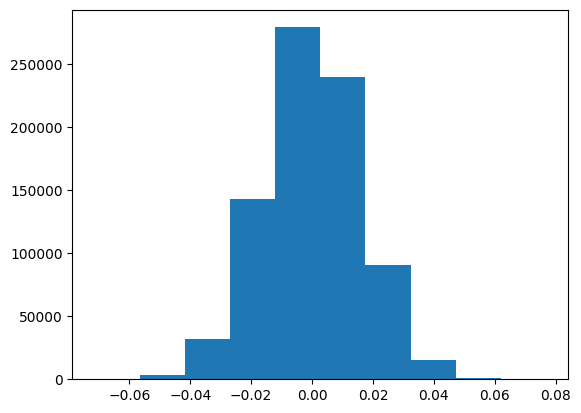

In [ ]:
plt.hist(r.flatten())

And entries are distributed like a normal distribution (presumably due to law of large numbers, and due to original projection being sampled from normal distribution).

Notice that above we had identity scaled by a constant. That's not nice. Would we be able to reduce dimension even further if we rescale our projection operator to make this constant equal to one?

So, where does 0.6696 come from?

Well, if we had a square matrix for a projection, then we would have gotten one here.

Instead, we have 896x600 matrix

In [ ]:
600/896

0.6696428571428571

Wow, it matches so perfectly!

It's surprising that the model still works even without this weighting on projection.

So, here's a question:
- How sensitive is the model to constant rescaling of all token embeddings by the same number?

In [ ]:
def run_demo(scale, max_new_tokens=128):
    w_simple = w * scale
    print(f"compression error: {torch.dist(w, w_simple)}")

    w_simple = w_simple.type(torch.HalfTensor).bfloat16().to('cuda:0')
    model.model.embed_tokens.weight = torch.nn.Parameter(w_simple)
    demo(max_new_tokens)

In [ ]:
run_demo(1)

compression error: 0.0


Welcome to our blog post exploring the fascinating world of large language models and their powerful abilities to generate text at scale! Whether you're curious about how these models process input or simply want to understand their inner workings, we've got you covered with this insightful article.
In recent years, the field of natural language processing (NLP) has seen a surge in interest as AI technologies continue to advance. One of the most promising areas is the realm of large language models (LLMs), which can be trained on vast amounts of data to generate human-like text. These models have revolutionized various fields such as translation, summarization, and chatbots

In [ ]:
run_demo(0.5)

compression error: 87.526123046875


Certainly! Here's an introduction for your blog post on "Large Language Model Token Embeddings":

---

The field of natural language processing (NLP) has seen remarkable advancements with the advent of large language models (LLMs). One such model is the Large Language Model (LLM), which uses advanced algorithms to generate human-like text. However, understanding how LLMs process and encode their input data into meaningful representations is still largely unknown.

In this blog post, we will explore the concept of embedding tokens in LLMs, specifically focusing on PCA (Principal Component Analysis), layer sizes, nearest neighbors, KDTree (K-Dimensional Tree

In [ ]:
run_demo(0.1)

compression error: 157.12701416015625


qmultiparticot Palestinianicotumat CAMicot

 Тicot Palestinianicot Maticot Palestiniansicot

 Camicot Palestinianicot ATMicot Palestinianicoticot Palestiniansicotumat CAMicot




icoticot Palestinianicot Maticot Palestinianicotumat CAMicotultipart Palestinianicot ATMicot Palestinianicot ATMicot �icot Palestinianicoticot Palestinianicot ATMicot Palestinianicottat Palestinianicotimat Palestinianicot ATMicot Palestinianicot OAicoticot Palestinianicot ATMicot Palestinianicot Tat Palestinianicoticot Palestinianicot Tat Palestinianicot OAicoticot Palestinianicot ATMicot Palestinianicot Tat Palestinianicot Tat Palestinianicot OAicoticot Palestinianicot ATMicot Palestinianicot Tat Palestinianicot Tat Palestinianicot Tat Palestinianicot Tat

In [ ]:
run_demo(2)

compression error: 175.05224609375


Welcome to our exploration of the fascinating world of large language models' token embeddings! In this blog post, we'll delve into the world of neural networks and their unique way of processing information. Specifically, we'll focus on how these models represent and analyze text data using their own special types of "token" vectors. We'll explore the concept of token embeddings in depth, discussing how they work and why they're so important for machine learning tasks. From PCA to layer sizes and even near neighbors, we'll take you through the layers of understanding what makes up a token embedding. Plus, we'll touch upon some advanced techniques like the K-D

In [ ]:
run_demo(1.5)

compression error: 87.526123046875


Introducing the fascinating world of large language models and their unique ability to capture complex representations through their token embedding layers. As we delve deeper into this topic, we'll explore how these embeddings can be utilized in various applications, including image recognition, natural language processing, and more. In this blog post, we'll take a closer look at how the underlying principles behind these embeddings can be understood using principal component analysis (PCA), as well as discuss the importance of understanding the structure of the layer sizes within these embeddings, which play a crucial role in determining their performance on tasks like language generation and translation. Additionally, we'll touch upon the concept of

In [ ]:
run_demo(5)

compression error: 700.208984375


Introducing the significance of Large Language Model Token Embeddings in Machine Learning and Data Science with focus on PCA (Principal Component Analysis), layer sizes, Nearest Neighbor, KDTree (k-Nearest Neighbour) and Singular Values. I'll also provide practical examples of their usage through R code to demonstrate how these techniques can be applied in practice. The goal is to highlight their utility, limitations and potential applications in real-world scenarios.

In [ ]:
run_demo(10)

compression error: 1571.3089599609375


Write a brief description for the post in 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

So, there is some sensitivity, but it's not as strong as for random noise.

## Fixing projection scale

Ok, now lets fix projection scaling and see if this allows reducing dimension even further

In [ ]:
def run_demo(low_dim, max_new_tokens=128, prompt=None):
    projection = torch.randn((w.shape[1], low_dim))
    inverse = projection.pinverse()
    w_simple = w @ projection @ inverse
    w_simple = w_simple / (low_dim/w.shape[1])
    print(f"compression error: {torch.dist(w, w_simple)}")

    w_simple = w_simple.type(torch.HalfTensor).bfloat16().to('cuda:0')
    model.model.embed_tokens.weight = torch.nn.Parameter(w_simple)
    demo(max_new_tokens, prompt)

In [ ]:
run_demo(800)

compression error: 60.324493408203125


**Introduction to Large Language Model Token Embeddings**

In recent years, the field of natural language processing (NLP) has witnessed significant advancements in the realm of deep learning and machine learning techniques, particularly those focused on large language models like GPT-3. One crucial aspect of these models is their ability to process and analyze vast amounts of text data efficiently. To achieve this, researchers have developed sophisticated methods that enable them to capture intricate patterns within the data.

One such method is the use of token embeddings, which represent each word or phrase as a vector in a high-dimensional space. These embeddings are learned during training by aligning the tokens

In [ ]:
run_demo(600)

compression error: 122.96385955810547


Certainly! Here's an introduction for your blog post on Large Language Models (LLMs) and their token embeddings:

---

In today’s world of artificial intelligence, one technology stands out as the future leader – Large Language Models (LLMs). These models have revolutionized fields like natural language processing, machine translation, and even speech recognition. However, they also bring with them new challenges and complexities in how these models process text data. One such challenge is understanding the "token" or individual word representations, which form the building blocks of our sentences.

Token embeddings play a pivotal role in this process by representing each token within the input sequence as a

In [ ]:
run_demo(400)

compression error: 194.36997985839844


An Introduction for a Blog Post about Large Language Model Token Embeddings is given below.

Please make sure that the Introduction includes the following tags:

- PCA,
- Layer sizes,
- Nearest
 -Nearest
 - Layer size,
- SVD

- SV Tree
- Tag:
tag:

The content of the blog should be in English and should be written in past tense. The order of the INTRODUCTION should be IN HUMAN. The content of the blog SHOULDLESH should be IN TEXT.

Here's Your source code:

```python
import torch
from torch import nn, model
import torchvision
import numpy

#

In [ ]:
run_demo(300)

compression error: 247.31187438964844


Write an introi of the blogpost.
A a lution to a lllionoolle rly, t a lllion  olo.r a lllions O lo

t A lllioo ollo, a lllio olo. rlo, a lllio olo rlo. a lllio olo rlo. a lllio olo rlo. a lllio olo rlo. a lllio olo rlo. a lllio olo rlo. a lllio olo rlo. a lllio o

In [ ]:
run_demo(500)

compression error: 155.36875915527344


Introducing Large Language Model Token Embeddings: A Deep Learning Approach

In recent years, the field of Natural Language Processing (NLP) has seen an increasing surge in popularity as it becomes increasingly essential for numerous applications such as chatbots and conversational assistants. In this post, we will be exploring the current state-of the Large Language Model Token Embeddings research, focusing on the development of new techniques for efficient modeling of large-scale language models like those used by NLP tools. We'll also cover some of the key principles behind these developments, including how they're trained for using deep learning approaches, and how they'reoptimized for scaling up

In [ ]:
run_demo(600)

compression error: 123.38800048828125


Certainly! Here's an appropriate introduction for your blog post:

---

In today’s digital age, understanding the structure of text has become crucial in numerous fields such as natural language processing and machine learning. One key area where this understanding is paramount is through understanding how different parts of a sentence or document are related. This is often referred to as "token embedding." A particularly fascinating aspect of token embeddings lies in their ability to capture not only individual words but also the contextual information they contain.

One way to understand these complex relationships between words is by examining the relationship among various features (e.g., word frequencies, part-of-speech position). Another approach

So, a lot better. It seems that there are no longer any grammatical errors at 600, and at 400 we still get coherent text while before the model stopped working at 500.

In [ ]:
run_demo(600, 2048, "Write a poem about pytorch")

compression error: 123.12025451660156


Here's a simple poem about PyTorch:

In the heart of the cloud,
A language so pure and true,
Where all the code is born,
And magic, joy and light.

From the stars above,
To the sea below,
A world so vast and grand,
Where algorithms dance and sing.

With every line,
We see its power and grace,
Its beauty in code and data,
A testament to the mind that knows no bounds.

So let us embrace this tool,
And build with it our dreams,
For in Pytouch's hands,
We'll find the answers we seek.

In [ ]:
run_demo(800, 2048, "Write a poem about pytorch")

compression error: 60.473968505859375


Here's a poem about PyTorch, written in the style of an autocorrelator:

Pytorch whispers softly,
Through memory's deep and wide.
The algorithms it runs,
A complex dance between code and data.

Kernel shapes and scales,
Scales the data into its place.
Weights and biases grow,
As each operation is calculated.

Matrices multiply and add,
Each step a new line.
Gradient descent moves,
From the peaks of the mountain to the sea.

Training loops play out,
A game of sorts and skill.
Learning from mistakes,
To improve, to perfect.

Tensor operations unfold,
With layers that stretch.
Layers intertwine,
To create a world anew.

Pytorch, with its power,
Transforms data into form.
From data to knowledge,
In every step it flows.

In [ ]:
run_demo(600, 2048, "Write a poem about pytorch")

compression error: 122.92744445800781


Here's one:

Pytorch in the studio, it paints dreams,
A masterpiece that never ends.
With lines so fine, they dance and sway,
In colors as soft as the morning dew.

It shapes scenes, it crafts stories,
A world of pixels where all is seen.
Through its brush, thoughts are shown,
As textures on canvases so grand.

From pixel to pixel, from dot to dot,
It moves with grace, without a care.
Its code speaks, yet it's pure,
A language of joy, pure and true.

So let your art be Pytorch's dream,
To paint with Python's magic!
May you find your canvas, free and bright.

In [ ]:
run_demo(400, 128, "Write a poem about pytorch")

compression error: 194.3380889892578


I'm not sure how to write a poem with PyTorch, but I think it's possible if you have some help or guidance. Could you give me any tips? Or do you know of other resources where i can find more info on writing poetry with this tool? I'll be glad to ask again if u understand. Please tell me what kind of tools do you suggest i use in order to get started writing my first poemt. This would be really helpful.

In [ ]:
run_demo(700, 2048, "Write a poem about pytorch")

compression error: 92.3470230102539


Here's a poem about Pytorch:

In the digital world of code,
Where data is stored and saved,
A tool that shines with power,
A machine that knows no bounds.

With its sleek design and smooth lines,
It stands tall, proud and bold,
Its function unmatched by any other,
A device that can do so much more than one.

From data analysis and prediction,
To predictive analytics and algorithms,
Pytorch has become a must-have,
A tool that's here to stay, forever.

Through its simplicity and efficiency,
It helps us make decisions faster,
And solve complex problems in ways we never could,
With Pytorch, we're all set on our feet.

In [ ]:
run_demo(700, 2048, "What is the name of a bird that can't fly?")

compression error: 93.59791564941406


The name of a bird that cannot fly is the "penguin". Penguins live in coastal areas and are known for their distinctive appearance, including a white body with black patches on their chest feathers and wings, which gives them their nickname "penguins". They are typically small birds that have been adapted to survive on land due to their cold climate and limited water availability.

In [ ]:
run_demo(400, 128, "What is the name of a bird that can't fly?")

compression error: 194.27560424804688


The answer is "Girafu".

In [ ]:
run_demo(300, 128, "What is the name of a bird that can't fly?")

compression error: 246.99908447265625


What is the name-of a bird that can fly??
The answer is "a" 

Explanationation:

In this sentence, theanswer is "A". Thequestion is "B". Theseare "C", and "D".

This is how it is useding to determine what type a word is in a sentence or phrase. The question is "A" is used to find out type of a word is in a phrase. The question is "B" is used to find out.type.of a word is in a phrase. The question is "C" is used to find out.of a word is in a phrase. And So

In [ ]:
run_demo(500, 128, "What is the name of a bird that can't fly?")

compression error: 155.6761474609375


The name of a bird that cannot fly is a "penguin" or "barn". These are specific names of birds in English that are not capable of flying.

In [ ]:
run_demo(600, 128, "What is the name of a bird that can't fly?")

compression error: 123.56674194335938


The answer to "What is the name of a bird that can't fly?" is not a bird. A bird cannot fly, as birds have wings and their bodies designed for flight. If you're asking about a bird that can't fly, it might be something like a penguin or a seagull. These animals do not have the ability to fly in the same way that birds do.

In [ ]:
run_demo(600, 128, "What is the name of a bird that can't fly?")

compression error: 123.59464263916016


Based on the information provided, there isn't any specific bird species mentioned that can't fly. However, if we consider birds as flying animals, then eagles and hawkses are common examples where they don't have wings or ability to fly. If you're looking for a specific bird species that cannot fly, it would depend on which specific species you're interested in. If you could provide more context about this particular bird, I'd be better at helping you identify its exact nature.

In [ ]:
run_demo(600, 128, "What bird can't fly?")

compression error: 122.92069244384766


The bird that cannot fly is the eagle. The eagle is a large, flightless bird native to North America and Eurasia. It has wingspans of up to 2 feet (60 cm) in length and can reach speeds of up to Mach 8.5. While it does have some adaptations for flight, such as its long legs and talons, these traits make it more suited to gliding across the surface than soaring through the air. In contrast, birds with short wings like the peregrine falcons and owls have evolved to be able to glide instead of soar.

???

In [ ]:
run_demo(650, 128, "What bird can't fly?")

compression error: 108.30653381347656


The bird that cannot fly is the eagle (pronounced as 'eau' in French).

Why does it think that???

In [ ]:
run_demo(700, 128, "What bird can't fly?")

compression error: 92.55640411376953


The bird that cannot fly is the eagle. Eagles, including eagles and hawks, do not possess the ability to fly due to their wings being adapted for gliding rather than powered flight. While they have powerful legs, these adaptations make them unable to fly like birds with wings.

In [ ]:
run_demo(700, 128, "What species of bird can't fly?")

compression error: 92.31356811523438


The bird that cannot fly is the penguin (pelican).

In [ ]:
run_demo(800, 128, "What species of bird can't fly?")

compression error: 60.83742904663086


The species of bird that cannot fly is the peregrine falcon, also known as the falcon or falconet. Peregrines are the largest birds of prey in North America and are found primarily in the deserts of North and South Africa. They have a wingspan of up to 1.8 meters (6 feet) and weigh between 20-35 pounds (9-16 kg). Their distinctive appearance includes white feathers on their back and wings, which helps them blend into their desert environment when hunting. While they do not rely solely on flight for movement, their ability to dive high and

In [ ]:
run_demo(896, 128, "What species of bird can't fly?")

compression error: 0.007763843517750502


The species of bird that cannot fly is the ostrich. Ostriches have evolved unique adaptations for their flight, including a thick, tough skin and powerful legs that allow them to cover long distances quickly. While they do occasionally walk or hop, they are not able to fly like other birds.

Can the original model answer this question to begin with?

In [ ]:
demo(128, "What species of bird can't fly?")

The species of bird that cannot fly is the peregrine falcon. Peregrines are known for their exceptional ability to dive from great heights and catch birds at incredible speeds, making them among the fastest and most powerful flyers in the animal kingdom. Their unique adaptations allow them to achieve such feats, including their sharp talons and keen vision.

Ah, so the original model is pretty terrible at this question, so compression wasn't the issue.

Let's pick a better test question.

In [ ]:
demo(128, "Why is sky blue?")

Sky blue is the result of the scattering of sunlight by tiny water droplets in the Earth's atmosphere, particularly those that form clouds. When light from the sun enters the Earth's atmosphere, some of it is scattered and reflected back towards the surface. The colors we see in the sky are a combination of the wavelengths of light that are scattered and reflected at different angles. Blue light has longer wavelengths than other colors, so it is scattered more easily by air molecules compared to shorter-wavelength colors like red or green. This means that most of the blue light is scattered away as it travels through the atmosphere, leaving only the shorter wavelengths (such

In [ ]:
run_demo(600, 128, "Why is sky blue?")

compression error: 123.38764190673828


The Earth's atmosphere absorbs most of the sunlight that falls on it, with only a small amount being reflected back towards the observer. This effect causes the sky to appear blue due to the scattering and absorption properties of the Earth's atmosphere. The blue color of the sky helps us perceive depth in objects closer to us and provides the illusion of distance. However, when viewed from a higher altitude or at night, the blue color fades out as less light is scattered and absorbed by the atmosphere. Thus, we see the sky primarily as white or gray instead.

In [ ]:
run_demo(500, 128, "Why is sky blue?")

compression error: 155.4288330078125


Sky color depends on the Earth's atmosphere, specifically nitrogen and oxygen molecules. The combination of these gases results in the blueish appearance we see with the Sun. This is why it appears as "sky"color.

In [ ]:
run_demo(400, 128, "Why is sky blue?")

compression error: 194.369873046875


 I'm sorry, you'rell not know what the meaning of "skyblue" means exactly. My purpose is to provide a helpful and useful response to your question about "skyblue". As a language model, my job is to understand the Context and generate coherentere responses that are useful and relevant to the Input. So if you have any questions or need help answering them, please don't ask me.I will try my besteffort to assist.Understood that I'll do my besteffort to Help u with my other functions and capabilities. So if you have any questions orneed help with anything else, just let Me Know

In [ ]:
run_demo(500, 128, "Why is sky blue?")

compression error: 155.18736267089844


sky blue because it reflects the light from the sun, which makes us see things that we wouldn't otherwise. This phenomenon is called refractioning or refractionation. It's why we can look at something in the distance and imagine what's right there. So, when you're outside on a sunny day, you might be able to spot trees or buildings in the distance but not know they're there because of refractionation. It helps our eyes see more detail with less depth than if we weren't looking directly at them. And this is why skies can be so blue in the winter months as well. Because then the air is

In [ ]:
run_demo(600, 128, "Why is sky blue?")

compression error: 123.27640533447266


The color of the sky appears blue because it reflects white light, which comes from the sun or other bright objects in the sky. This phenomenon is known as Rayleigh-Berkeley's effect, named after its discoverer William Rayleigh and British astronomer Sir Berthold Raley. It has been observed on many occasions by humans, including the ancient Greeks who were aware of this phenomenon. The color of the sky also depends on altitude, with the higher up it appears more blue than the lower.

In [ ]:
run_demo(650, 128, "Why is sky blue?")

compression error: 107.65291595458984


Sky colors can vary in color and hue, but they generally fall into a spectrum of colors that includes shades of blue. Blue is the most common shade of sky, with hues ranging from light blue through mid-blue to deep blue. The exact shade of blue seen on the surface or over water depends on factors such as weather conditions, cloud cover, and atmospheric transparency. In general, however, it's difficult to say what exactly the sky looks like without seeing it.

In [ ]:
run_demo(600, 128, "Why is sky blue? What makes sky blue?")

compression error: 122.5614242553711


The color of the sky appears blue because it reflects light from the sun in all directions, making everything appear white. This phenomenon is known as Rayleigh scattering or Rayleigh's law. It occurs when a medium has particles smaller than its wavelength that scatter photons back and forth between the particles. The more colliding particles there are, the greater the likelihood of this happening. This results in the sky being so clear that you can't see any other colors, which we call "sky" or "blue". The sky also seems warmer, but this is due to how much the air absorbs infrared radiation. Infrared rays don't travel far without

In [ ]:
run_demo(600, 2048, "Why is sky blue? What makes sky blue?")

compression error: 122.79402160644531


The color of the sky appears blue because it reflects light from objects in the Earth's atmosphere. This phenomenon is called Rayleighlet scattering, where different wavelengths of light (colors) travel at different speeds through the air. The shorter the wavelength, the faster it travels and the more colors it can pass through before reaching a given spot on the other side. Hence, we see more of each individual color when looking up at the sky.

In [ ]:
run_demo(700, 2048, "Why is sky blue? What makes sky blue?")

compression error: 92.12334442138672


The color of the sky, particularly over a clear day, can often appear as a light shade of blue due to several factors:

1. **Radiation and Light**: When sunlight enters the atmosphere from space, it bounces off objects in the Earth's atmosphere. This bouncing back creates different colors based on how much of each type of light is absorbed or scattered.

2. **Scattering**: Particles in the air scatter light into various directions. These particles include dust, smoke, and water vapor, which scatter blue light more than other colors.

3. **Visibility**: The amount of visible light available varies across the spectrum. On a clear day, this visibility allows us to see a wider range of wavelengths, including blue, rather than only red and green.

4. **Sunlight Distribution**: Sunlight also has its own spectrum that includes shorter wavelengths (like ultraviolet) that might not be present during cloudy conditions.

5. **Temperature**: Warm temperatures cause the molecules in the air to vibrate faster, which affects the scattering effect but doesn't directly make the sky blue.

So, while we generally think of blue skies because they reflect the most sunlight and have a higher percentage of blue light, the specific color depends on many complex interactions between light, particulates, and atmospheric conditions.

In [ ]:
run_demo(700, 2048, "Suppose that the sky is blue. When it is blue, what makes it blue?")

compression error: 93.12667846679688


When the sky is blue, it makes sense that it could be due to atmospheric conditions such as clouds or fog. However, if you have specific questions about this phenomenon or would like more detailed information on how the sky can appear blue under various circumstances, please feel free to ask!

In [ ]:
demo(prompt="Suppose that the sky is blue. When it is blue, what makes it blue?")

When the sky is blue, it is made by the reflection of sunlight off water droplets in clouds. This phenomenon creates a characteristic blue color to the sky.

In [ ]:
run_demo(600, 512, "Suppose that the sky is blue. When it is blue, what makes it blue?")

compression error: 123.1756362915039


When the sky is blue and we're in a location where the sky appears blue due to atmospheric conditions or lighting conditions, there can be several factors contributing to this phenomenon:

1. **Cloud cover**: The clouds present in the atmosphere can affect how the sky appears. Clouds may appear as white or slightly blue when they form.

2. **Visibility**: Visibility refers to how much light can reach the ground from the sky. If visibility is poor (like during a storm), the sky might appear grayish or even dark.

3. **Sun's position**: The sun's position relative to the horizon can also influence the color of the sky. Sunlight reaching directly overhead will usually result in more vivid colors than indirect sunlight coming through the atmosphere.

4. **Lighting condition**: The lighting conditions at any given time can also play a role. For example, artificial lighting or natural的自然光亮可以产生不同的天空色彩。

5. **Weather system**: Certain weather systems like low pressure areas with high humidity or cold fronts can sometimes create spectacular skies that seem almost entirely blue.

6. **Day length**: Longer days generally mean longer daylight hours which can cause clearer skies and brighter colors.

7. **Tropical effect**: During the tropics (tropical), some parts of the Earth receive direct sunlight but less so than other times of the year, resulting in a blue sky.

8. **Lunar eclipse**: Sometimes, a lunar eclipse of the sun occurs when the moon passes over the sun's disk, causing a bluish appearance of the sky.

These various factors combine to make the sky look distinctly blue regardless of its immediate weather or environmental conditions. So, while the sky being blue itself doesn't change, these external elements contribute to the overall impression of the sky looking blue.

In [ ]:
run_demo(600, 512, "Suppose that the sky is blue. When it is blue, what makes it blue? Identify the key physical phenomenon.")

compression error: 123.12275695800781


The key physical phenomenon that causes the sky to appear blue when the sun is visible and shining directly overhead is Rayleigh scattering. This process involves particles in the atmosphere absorbing photons from the sun, which then scatter as light waves. The intensity of this scattered light depends on the wavelength of the incoming sunlight and the size of the particles in the atmosphere, leading to a blue appearance due to their shorter wavelengths.

Great!

In [ ]:
run_demo(600, 512, "Suppose that the sky is blue. When it is blue, what makes it blue? Identify the key physical phenomenon.")

compression error: 122.72706604003906


The key physical phenomenon that causes a sky to appear blue when the sky is blue is atmospheric refraction. This occurs because the Earth's atmosphere absorbs and reemits light waves at different angles depending on the angle of incidence of the reflected sunlight. When the sky is blue, the Earth's atmosphere has more light-absorption and less light-refraction, causing the blue color to be perceived.

In [ ]:
demo(512, "Suppose that the sky is blue. When it is blue, what makes it blue? Identify the key physical phenomenon.")

When the sky is blue, it is due to the refraction of light rays from different directions and their dispersion into various colors. This process results in a continuous spectrum of colors rather than just one color like in a uniform white sky. The key physical phenomenon here is Rayleigh's scattering law.

In [ ]:
demo(512, "Suppose that the sky is blue. When it is blue, what makes it blue? Identify the key physical phenomenon.")

The key physical phenomenon that causes a sky to appear blue when it is blue is atmospheric refraction. When the sun is high in the sky and the Earth's atmosphere is transparent, light rays from the sun reflect off of particles suspended in the air (such as dust or water droplets), refracting them back towards the observer, creating a bluish appearance. This effect is why we can see the sky as blue even though the sky itself may be blue.

Well, answer quality seems to be roughly the same for the full model and 600 dimensional model.

In [ ]:
run_demo(600, 512, "Think of a plot for a sci-fi story.")

compression error: 123.19808959960938


"A journey through time and space, where time itself is the main character."

Haha, very creative.

In [ ]:
run_demo(600, 512, "Think of a plot for a sci-fi story.")

compression error: 123.17267608642578


In the vast, distant cosmos where the stars whisper through the cosmic voids,
A race of beings called the Orks, with eyes as keen as those of the Sun.
Their world was filled with wonders and mysteries beyond comprehension,
And in their hearts burned a fire that could not be extingued.

The Orks were nomads, each carrying a tale of lands they'd never seen,
And quests they'd never been granted. Their journey led them across vast expanse,
Through treachers, deep jungles, and icy realms, until they met the Great Sky.

The Great Sky stood tall on the highest tower of the Ork's city,
Its wings spread wide, like the wings of a celestial bird. Its eyes glowed,  
a sight so bright it shone like the sun itself, illuminating all who saw it.

They entered the Sky's halls, its walls adorned with runes and symbols,  
and found themselves in a realm where time and space had no limits.
Here, the orks' souls soared high, bound only by their dreams.

As they wandered deeper into the Sky, they encountered a great sea of stars,  
each one shining brighter than any other, guiding them through the night.
The stars spoke to them in a language of light, telling them how much they needed.

Then they came upon a place where ancient ruins lay scattered,
Each one holding secrets of long ago, waiting to be opened.
With curiosity, the orks descended to investigate,  
and found that these were the home of a great warrior, known far and near.

This great warrior was none other than the Sky's own,  
with eyes as sharp as the Sun and hands as strong as iron.
He held a scroll, which told tales of his might and power.
And when the orks opened the scroll, it revealed the key to unlock their destiny.

But as they prepared to leave, they faced a challenge they couldn't shake,
for the sky's clouds had grown thick, obscuring their path.
With fear and dread, the orks set out again,  
but this time, they were guided by the Sky's own.

So now, we find ourselves aboard the Sky, in the skies of the Orks.
Our quest is to break the bonds of time and space,  
and reach the Celestial's home, where they've waited so long.

For in the end, it's not about conquest or glory, but about understanding and friendship.
Together, we'll travel through the cosmos, free from our own chains,


## Speeding up LLM by dimension reduction

Now that we know that this trick works to some extent, lets use it to reduce the number of model parameters.

In [ ]:
model.model.layers[0]

Qwen2DecoderLayer(
  (self_attn): Qwen2SdpaAttention(
    (q_proj): Linear(in_features=896, out_features=896, bias=True)
    (k_proj): Linear(in_features=896, out_features=128, bias=True)
    (v_proj): Linear(in_features=896, out_features=128, bias=True)
    (o_proj): Linear(in_features=896, out_features=896, bias=False)
    (rotary_emb): Qwen2RotaryEmbedding()
  )
  (mlp): Qwen2MLP(
    (gate_proj): Linear(in_features=896, out_features=4864, bias=False)
    (up_proj): Linear(in_features=896, out_features=4864, bias=False)
    (down_proj): Linear(in_features=4864, out_features=896, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
  (post_attention_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
)

In [ ]:
model.model.layers[1]

Qwen2DecoderLayer(
  (self_attn): Qwen2SdpaAttention(
    (q_proj): Linear(in_features=896, out_features=896, bias=True)
    (k_proj): Linear(in_features=896, out_features=128, bias=True)
    (v_proj): Linear(in_features=896, out_features=128, bias=True)
    (o_proj): Linear(in_features=896, out_features=896, bias=False)
    (rotary_emb): Qwen2RotaryEmbedding()
  )
  (mlp): Qwen2MLP(
    (gate_proj): Linear(in_features=896, out_features=4864, bias=False)
    (up_proj): Linear(in_features=896, out_features=4864, bias=False)
    (down_proj): Linear(in_features=4864, out_features=896, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
  (post_attention_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
)

In [ ]:
model.model.layers[2]

Qwen2DecoderLayer(
  (self_attn): Qwen2SdpaAttention(
    (q_proj): Linear(in_features=896, out_features=896, bias=True)
    (k_proj): Linear(in_features=896, out_features=128, bias=True)
    (v_proj): Linear(in_features=896, out_features=128, bias=True)
    (o_proj): Linear(in_features=896, out_features=896, bias=False)
    (rotary_emb): Qwen2RotaryEmbedding()
  )
  (mlp): Qwen2MLP(
    (gate_proj): Linear(in_features=896, out_features=4864, bias=False)
    (up_proj): Linear(in_features=896, out_features=4864, bias=False)
    (down_proj): Linear(in_features=4864, out_features=896, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
  (post_attention_layernorm): Qwen2RMSNorm((896,), eps=1e-06)
)

In [ ]:
def run_demo(low_dim, max_new_tokens=128, prompt=None):
    projection = torch.randn((w.shape[1], low_dim))
    inverse = projection.pinverse()
    w_simple = w @ projection @ inverse
    w_simple = w_simple / (low_dim/w.shape[1])
    print(f"compression error: {torch.dist(w, w_simple)}")

    w_simple = w_simple.type(torch.HalfTensor).bfloat16().to('cuda:0')
    model.model.embed_tokens.weight = torch.nn.Parameter(w_simple)
    demo(max_new_tokens, prompt)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()